# Image Classification
image classification using ANN by Dr.tanapon Tantisripreecha

Email: tanapon.tan@mahidol.ac.th

link: https://colab.research.google.com/drive/1kS55ZNVP_qHwxvidlzE5D-jCIHY-Y_Qs?usp=sharing


การสร้าง Classification โดยใช้ Machine learning กับรูปภาพ

# Import Libary

In [3]:
 pip install keras

In [4]:
pip install tensorflow

In [5]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 857.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=0bc98c6db9949ae175ba9eab6a5b2d879101245b29accd7b81b2cf29005d58ca
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [6]:
import numpy as np
import io
import pandas as pd
import matplotlib as pl
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

from keras.models import Sequential  # Model type to be used

from keras.layers import Dense, Dropout, Activation # Types of layers to be used in our model
from tensorflow.keras.utils import to_categorical

#from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
#from keras.layers.normalization import BatchNormalization
#from keras.layers.normalization import layer_normalization

# Loading dataset
การ Load image dataset เข้ามายัง colab จะสร้างข้อมูลใน Directory ดังต่อไปนี้

"/content/gdrive/My Drive/Colab Notebooks/dataset"

In [7]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)


Mounted at /content/gdrive


In [8]:
import os  #case connect via OS
os.chdir("/content/gdrive/")
os.getcwd()

'/content/gdrive'

ตัวอย่างการแปลงรูปภาพให้เป็น array

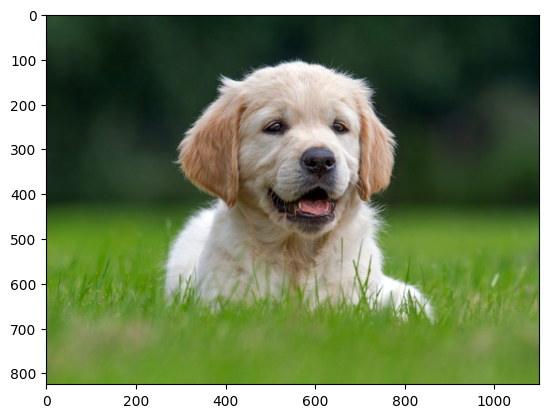

In [10]:
path_test = "/content/gdrive/MyDrive/Colab Notebooks/dataset/dog.jpg"
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img_test = mpimg.imread(path_test)
imgplot = plt.imshow(img_test)
plt.show()

In [11]:
img_test.shape

(825, 1100, 3)

In [9]:
pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 780.6 kB/s eta 0:00:00


In [15]:
# example of converting an image with the Keras API
from keras_preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img

# load the image
img = load_img(path_test,target_size=(5, 5)) # 5x5 pixel
print(type(img))
# convert to numpy array
img_arr = img_to_array(img)
#print type shape and the color  of pixel in array
print(img_arr.dtype)
print(img_arr.shape)
np.set_printoptions(threshold=np.inf) #Print NumPy array without truncation using set_printoptions() and threshold
print(img_arr)
# convert back to image
img_pil = array_to_img(img_arr)
print(type(img_pil))

#see RGB Compare  https://web.stanford.edu/class/cs101/image-1-introduction.html

<class 'PIL.Image.Image'>
float32
(5, 5, 3)
[[[ 22.  43.  26.]
  [ 26.  47.  30.]
  [ 12.  26.  27.]
  [ 25.  54.  32.]
  [ 17.  39.  27.]]

 [[ 28.  45.  27.]
  [123. 128. 132.]
  [164. 142. 128.]
  [ 32.  42.  31.]
  [ 42.  49.  42.]]

 [[ 30.  52.  29.]
  [ 40.  63.  35.]
  [ 99.  85.  58.]
  [ 35.  49.  24.]
  [ 28.  49.  18.]]

 [[103. 140.  37.]
  [194. 204. 206.]
  [122. 108.  73.]
  [121. 159.  84.]
  [107. 149.  47.]]

 [[118. 138.  77.]
  [109. 146.  53.]
  [106. 142.  46.]
  [100. 138.  35.]
  [126. 147.  78.]]]
<class 'PIL.Image.Image'>


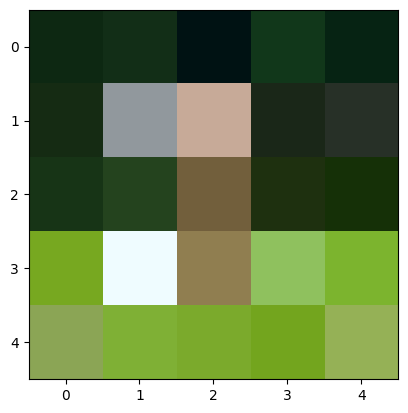

In [13]:
imgplot = plt.imshow(img_pil)
plt.show()

ดึงชื่อ image file และ category ของแต่ละไฟล์

In [16]:
path = "/content/gdrive/MyDrive/Colab Notebooks/img_dataset"
files = os.listdir(path)

In [19]:

categories = []

for filename in files:
    category = filename.split('.')[0]
    if 'fire' in category:
        categories.append("1")
    elif 'water' in category:
        categories.append("0")
    else: pass
df = pd.DataFrame({
    'filename': files,
    'category': categories
})


In [20]:
print(df.head(16))

      filename category
0   water5.png        0
1   water6.png        0
2   water3.png        0
3   water7.png        0
4   water4.png        0
5   water2.png        0
6    fire3.png        1
7    fire1.png        1
8    fire2.png        1
9    fire4.png        1
10   fire5.png        1
11   fire6.png        1
12   fire7.png        1
13   fire8.png        1
14  water8.png        0
15  water1.png        0


แปลงไฟล์รูปภาพให้อยู่ในรูปแบบ numpy array แล้วเก็บไว้ในตัวแปร X และ category เก็บไว้ในตัวแปร y

In [21]:
X =  np.empty([0])
y = np.empty([0])
for filename in files:
    print(path+"/"+filename)
    # load the image
    img = load_img(path+"/"+filename)

    #print(type(img))
    #print(img.format)
    #print(img.mode)
    print(img.size)
    img.show()


     # convert to numpy array
    img_array = img_to_array(img)

    X = np.append (X,img_array)
    category = filename.split('.')[0]
    if 'fire' in category:
        y = np.append(y,[1]).astype(int)
    elif 'water' in category:
        y = np.append(y,[0]).astype(int)
    else: pass

/content/gdrive/MyDrive/Colab Notebooks/img_dataset/water5.png


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/water6.png


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/water3.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/water7.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/water4.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/water2.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/fire3.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/fire1.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/fire2.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/fire4.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/fire5.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/fire6.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/fire7.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/fire8.png


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/water8.png
(120, 120)
/content/gdrive/MyDrive/Colab Notebooks/img_dataset/water1.png
(120, 120)


In [22]:
#np.set_printoptions( )
X


Output hidden; open in https://colab.research.google.com to view.

In [23]:
print(y)

[0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0]


In [24]:
X = X.reshape(len(y),120,120,3) #create 16 array list, new shape (120*120) , list ละ 3 แถว
x_vector = 120*120*3

In [25]:
X

Output hidden; open in https://colab.research.google.com to view.

https://www.pluralsight.com/guides/importing-image-data-into-numpy-arrays

In [26]:
print(X.shape)
print(y.shape)
print(type(X))
print(type(y))

(16, 120, 120, 3)
(16,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


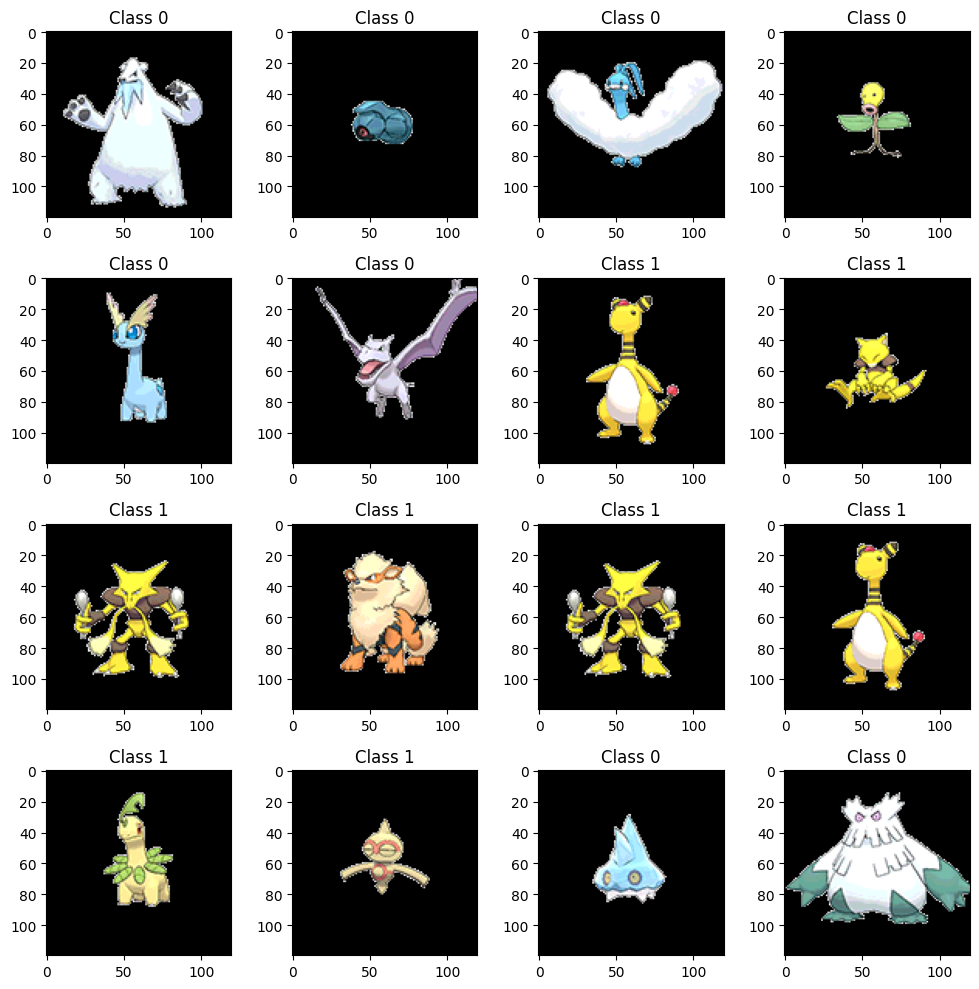

In [28]:
plt.rcParams['figure.figsize'] = (10,10) # change figure size to plot graph

for i in range(16):
    plt.subplot(4,4,i+1)
    img_array = X[i]
    plt.imshow(np.uint8(img_array)) #data type :  uint8 — unsigned integer (0 – 255)
    plt.title("Class {}".format(y[i])) # คำเฉลยอยุ่ในตัวแปร y

plt.tight_layout()

แบ่งข้อมูล train data และ test data

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=1000)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

print(type(X_train))
print(type(y_train))

len_train  = len(X_train)
len_test = len(X_test)

X_train shape (12, 120, 120, 3)
y_train shape (12,)
X_test shape (4, 120, 120, 3)
y_test shape (4,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [30]:
X_train

Output hidden; open in https://colab.research.google.com to view.

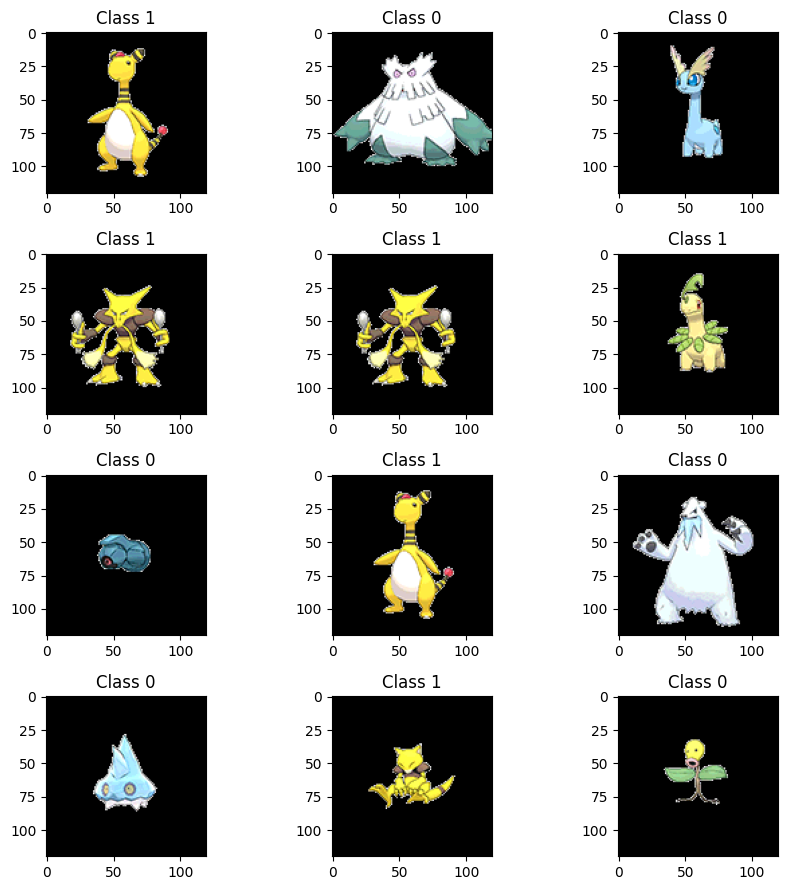

In [31]:

plt.rcParams['figure.figsize'] = (9,9) # change figure size to plot graph

for i in range(12):
    plt.subplot(4,3,i+1)
    img_array = X_train[i]
    plt.imshow(np.uint8(img_array))
    plt.title("Class {}".format(y_train[i]))

plt.tight_layout()

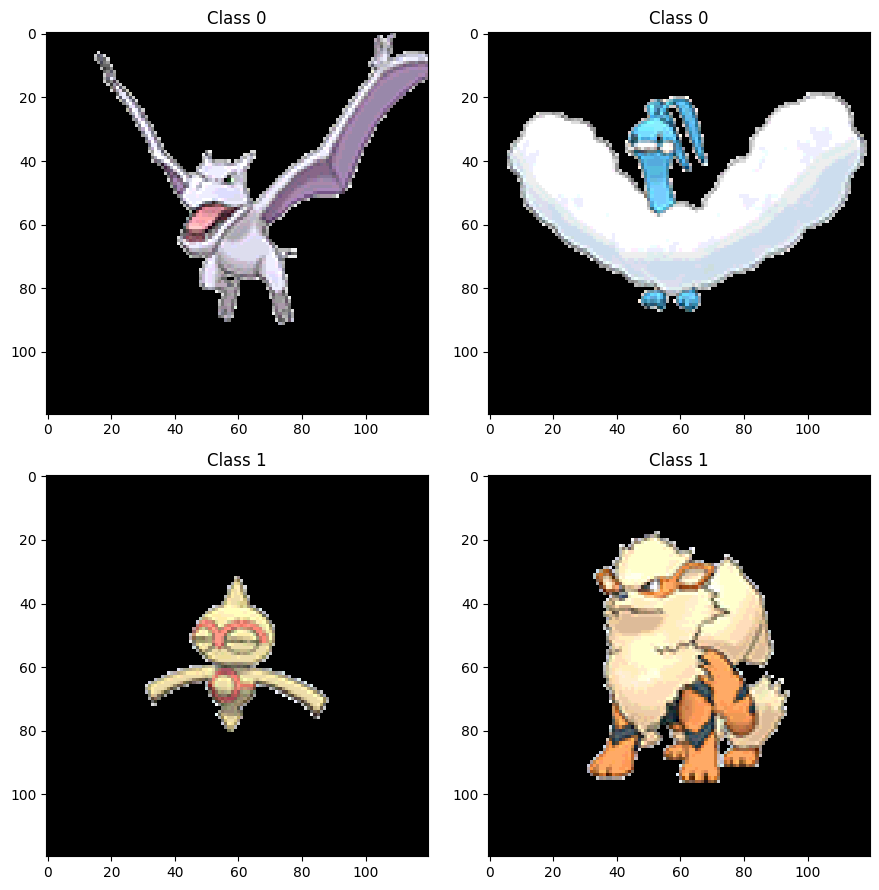

In [32]:
plt.rcParams['figure.figsize'] = (9,9) # change figure size to plot graph

for i in range(4):
    plt.subplot(2,2,i+1)
    img_array = X_test[i]
    plt.imshow(np.uint8(img_array))
    plt.title("Class {}".format(y_test[i]))

plt.tight_layout()

In [33]:
X_train = X_train.reshape(len_train, x_vector)  #x_vector 120*120*3
X_test = X_test.reshape(len_test, x_vector)

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255  # it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (12, 43200)
Testing matrix shape (4, 43200)


In [34]:
X_train

Output hidden; open in https://colab.research.google.com to view.

In [35]:
#in case  one-hot-endcoding

#nb_classes = 2 # number of unique digits

#Y_train = to_categorical(y_train, nb_classes) #Converts a class vector (integers) to binary class matrix.
#Y_test = to_categorical(y_test, nb_classes)
#print("y_train shape", y_train.shape)
#print("y_test shape", y_test.shape)

In [36]:
Y_train = y_train
Y_test = y_test
print("y_train shape", Y_train.shape)
print("y_test shape", Y_test.shape)

y_train shape (12,)
y_test shape (4,)


Prepare the test and train Data

#Neural Network using Tensorflow
กำหนดจำนวน class ที่ต้องการใน Y_train และ Y_test (Y ตัวใหญ่)
# Dropout
Drop out เป็น เทคนิคหนึ่งที่ช่วยแก้ปัญหาไม่ให้ model นั้นเกิดปัญหา Overfitting เกินไป

ดังนั้นจึงมีคนคิด เทคนิค Dropout มาช่วยแก้ปัญหานี้ขึ้น หลักการก็คือ ทำการ Random เพื่อที่จะ Drop node บาง node ที่อยู่ใน Neural Network(NN) เพื่อไม่ให้ node ใด node หนึ่งมีอิทธิพลมากเกินไป ก็คือ ช่วยๆ กัน เรียนรู้บ้าง โดยเราสามารถ ปรับได้ตั้งแต่ 0.1–1 ที่ไม่เอา 0 เพราะ ถ้า 0 คือ Drop ทิ้งหมดเลยแล้วจะเหลือใครทำงาน ?? ตัวอย่างเช่น ถ้าเรา Drop 60 % ก็คือ เหลือ Node ทำงานจริงๆ อยู่ 40%

Input layer


In [37]:
#Neural Network using Tensorflow
model = Sequential()
model.add(Dense(10, input_shape=(x_vector,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

Hidden Layer

In [38]:
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dropout(0.2))


Output Layer

In [39]:
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                432010    
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 activation_1 (Activation)   (None, 8)                 0         
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9

Complie model

In [40]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Learning

In [41]:
history = model.fit(X_train, Y_train, batch_size=5, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
3/3 [==============================] - 1s 134ms/step - loss: 0.8237 - accuracy: 0.3333 - val_loss: 0.8353 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 0s 37ms/step - loss: 0.9901 - accuracy: 0.5000 - val_loss: 0.7482 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 0s 35ms/step - loss: 0.6416 - accuracy: 0.6667 - val_loss: 0.7675 - val_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 0s 41ms/step - loss: 0.6420 - accuracy: 0.5000 - val_loss: 0.7070 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 0s 36ms/step - loss: 0.5824 - accuracy: 0.6667 - val_loss: 0.6523 - val_accuracy: 0.5000
Epoch 6/10
3/3 [==============================] - 0s 39ms/step - loss: 0.7422 - accuracy: 0.6667 - val_loss: 0.6378 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 0s 35ms/step - loss: 0.6144 - accuracy: 0.9167 - val_loss: 0.6375 - val_accuracy: 0.5000
Epoch 8/10
3/3 [==========

Evaluation

In [42]:
score = model.evaluate(X_train, Y_train, verbose = 0)
print('Train loss : ', score[0])
print('Train accuracy : ', score[1])

Train loss :  0.4988952875137329
Train accuracy :  1.0


In [43]:
score1 = model.evaluate(X_test, Y_test, verbose = 0)
print('Test loss : ', score1[0])
print('Test accuracy : ', score1[1])

Test loss :  0.6752045750617981
Test accuracy :  0.5


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


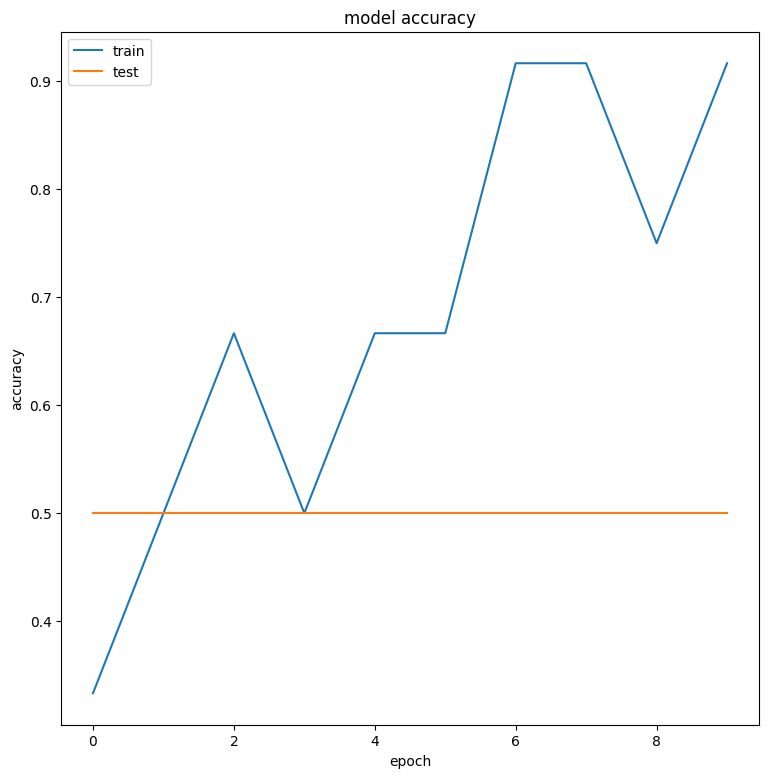

In [51]:
import matplotlib.pyplot as plt # For graphical representation
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [45]:
import keras
print(keras.backend.backend())
import tensorflow as tf
print(tf.__version__)

tensorflow
2.15.0


In [46]:
predict_x=model.predict(X_test)
print(predict_x)

1/1 [==============================] - 0s 93ms/step
[[0.3567809 ]
 [0.14971298]
 [0.40320376]
 [0.3045092 ]]


In [47]:
for i in range(4):
  #classes_x=np.argmax(predict_x,axis=-1)  # softmax
  classes_x = (predict_x[i] > 0.5).astype("int32") # for sigmoid
  print(classes_x)

[0]
[0]
[0]
[0]


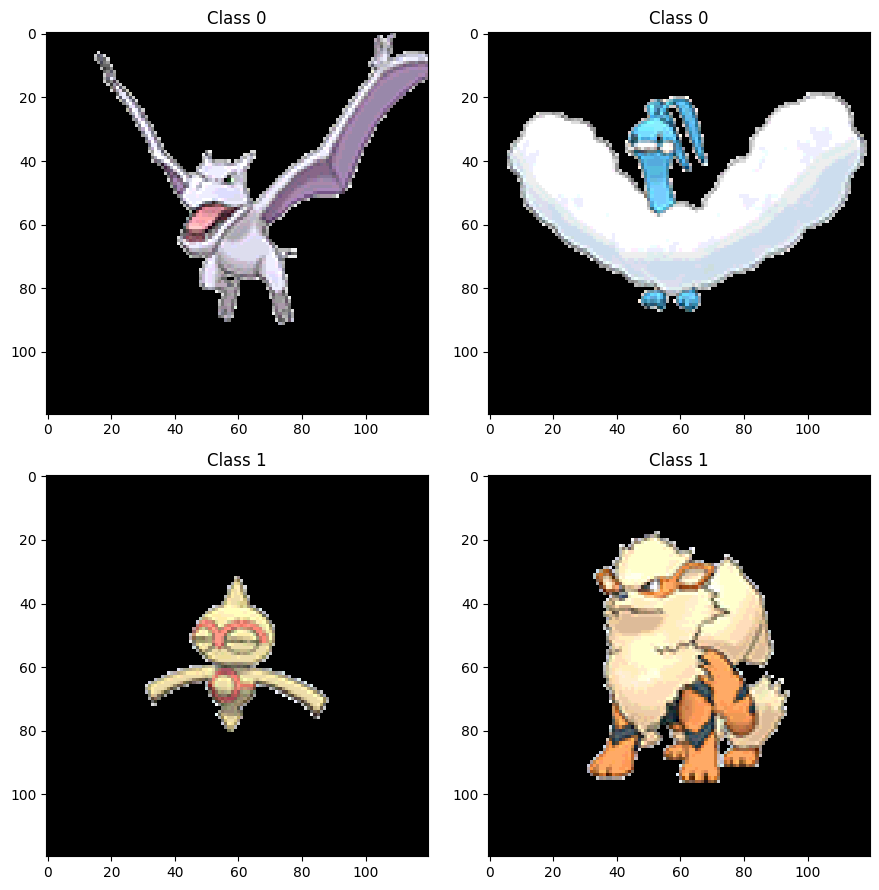

In [48]:
plt.rcParams['figure.figsize'] = (9,9) # change figure size to plot graph

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_test[i].reshape(120,120,3))
    plt.title("Class {}".format(y_test[i]))
plt.tight_layout()

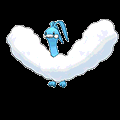

In [49]:
from tensorflow.keras.utils import array_to_img
image_show = array_to_img(X_test[1].reshape(120,120,3))
image_show


In [50]:

#print(np.argmax(predict_x[1])) #water = 0 , fire = 1
check_x = (predict_x[i] > 0.5).astype("int32") # for sigmoid
print("Actual Class : [",Y_test[1],"] Predicted Class  :", check_x)

Actual Class : [ 0 ] Predicted Class  : [0]
